# Exercício Reconhecimento de Padrões

Thais Lima de Sousa nUSP 8941220

In [1]:
from vpi.io import *
from vpi.binary_morphology import *
import os

<p> 
    <strong>1.)</strong> Implemente um classficador dos vizinhos mais próximos (KNN - k-nearest-neighbors) para a 
    classificação de imagens binárias de folhas de árvores. Na implementação desse classificador considere os 
    seguintes items:
    
    <ul>
        <li> Defina uma função de distância </li>
        <li> Escolha o valor de K </li>
        <li> A base de imagens são constituídas de imagens binárias e possuem apenas um componente conexo </li>
        <li> Considere as seguintes regiões das imagens (veja a imagem abaixo como exemplo):</li>
        <ul>
            <li>
                <strong>Metade Esquerda</strong>: Dívida a imagem verticalmente ao meio é a região da esquerda.
            </li>
            <li>
                <strong>Metade Direita</strong>: Dívida a imagem verticalmente ao meio é a região da direita.
            </li>
            <li>
                <strong>Metade de cima</strong>: Dívida a imagem horizontalmente ao meio é a região de cima.
            </li>
            <li>
                <strong>Metade de baixo</strong>: Dívida a imagem horizontalmente ao meio é a região de baixo.
            </li>
        </ul>
        <li> Utilize as seguintes caracteristicas para seu classificador </li>
        <ul>
            <li> Área da componente conexa da imagem </li>
            <li> Altura da imagem com peso 10000 </li>
            <li> Largura da imagem com peso 10000 </li>
            <li> Área dos componentes conexos da região da metade esquerda </li>
            <li> Área dos componentes conexos da região da metade direita </li>
            <li> Área dos componentes conexos da região da metade de cima </li>
            <li> Área dos componentes conexos da região da metade de baixo </li>
        </ul>
    </ul>
</p>

<div>
    <img src="images/example.png"/>
</div>

<p>
    Para o treinamento utilize as imagens binárias disponíveis em "dataset/train", onde cada pasta representa uma
    classe e as imagens dentro de cada pasta devem ser utilizadas para extrair características da classe no espaço
    de características. Por exemplo: a imagem em "./dataset/train/Alnus sp/iPAD2_C04_EX02_B.png" deve ser utilizada 
    para extração de características de um ponto da classe "Alnus sp".
</p>

<p>
    Seu classificador deve ter uma função de classificação que recebe um vetor de características (as
    caracteristicas citadas acima) e devolve a qual classe esse ponto pertence (lembre-se de que o classificador não
    necessita ser 100% preciso, assim como ocorre geralmente na prática).
</p>


In [2]:
C = {'Quercus suber': 1, 'Salix atrocinerea': 2, 'Populus nigra': 3, 'Alnus sp': 4, 'Quercus robur': 5,
          'Crataegus monogyna': 6, 'Ilex aquifolium': 7, 'Nerium oleander': 8, 'Betula pubescens': 9, 
          'Tilia tomentosa': 10}

In [3]:
def dist(X, x):
    return np.sum((np.sqrt((1.0*X - 1.0*x) ** 2)), axis = 1)

def knn(Xtest, Y, X, k = 3):
        # Xtest: amostras; Y: rótulo das classes das amostras de treinamento;
        # X: amostras de treinamento; k: número de vizinhos do classificador;
        # Ytest: classes das amostras Xtest
        
        Ytest = np.zeros((Xtest.shape[0],))
        
        for i in range(Xtest.shape[0]):
            d = dist(X, Xtest[i])
            labels = np.argsort(d)
            knn = Y[labels[0:k]].astype(int)
            Ytest[i] = np.argmax(np.bincount(knn))
        
        return Ytest.astype(int)

def features(imgname):
    img = read_binary_image(imgname)
    F = np.ndarray((7, ))

    # área da componente conexa da imagem
    F[0] = np.max(calculate_connected_components_area(img))
    # altura da imagem com peso 10000
    F[1] = 10000 * img.shape[0]
    # largura da imagem com peso 10000
    F[2] = 10000 * img.shape[1]
    # área dos componentes conexos da região da metade esquerda
    F[3] = np.max(calculate_connected_components_area(img[:, :int(img.shape[1] / 2)]))
    # área dos componentes conexos da região da metade direita
    F[4] = np.max(calculate_connected_components_area(img[:, int(img.shape[1] / 2):]))
    # área dos componentes conexos da região da metade de cima
    F[5] = np.max(calculate_connected_components_area(img[:int(img.shape[0] / 2), :]))
    # área dos componentes conexos da região da metade de baixo
    F[6] = np.max(calculate_connected_components_area(img[int(img.shape[0] / 2):, :]))
        
    return F.astype('uint32')   

In [4]:
# encontra número de classes e número de amostras
path = './dataset/train'
m = 0
for dirname in os.listdir(path):
    m += len(os.listdir(path + '/'+ dirname))

Y = np.ndarray((m,), 'uint32')
X = np.ndarray((m, 7), 'uint32')

i = 0
for dirname in os.listdir(path):
    for filename in os.listdir(path + '/'+ dirname):
        Y[i] = C[dirname]
        X[i, :] = features(path + '/' + dirname + '/' + filename)
        i += 1

<p>
    <strong>2.)</strong> Utilize as imagens na pasta "./dataset/test" para testar seu classificador, assim como os
    dados de treinamento, as imagens de testes estão em pastas que representam sua classe. Por exemplo, a imagem
    "./dataset/test/Tilia tomentosa/iPAD2_C10_EX02_B.png" é uma imagem da classe "Tilia tomentosa". Exiba qual 
    a precisão de seu classificador exibindo a porcentagem de acerto do classificador baseado nessas imagens de
    testes.
</p>

In [5]:
path = './dataset/test'
n = 0
for dirname in os.listdir(path):
    n += len(os.listdir(path + '/'+ dirname))

Xtest = np.ndarray((n, 7), 'uint32')
Ytest = np.ndarray((n,), 'uint32')

i = 0
for dirname in os.listdir(path):
    for filename in os.listdir(path + '/'+ dirname):
        Ytest[i] = C[dirname]
        Xtest[i] = features(path + '/' + dirname + '/' + filename) 
        i += 1

In [6]:
myYt = knn(Xtest, Y, X)
hits = (myYt == Ytest).sum()
percentage = hits / n * 100
print('%d acertos em %d amostras = %d %% de precisão'% (hits, n, percentage))

21 acertos em 32 amostras = 65 % de precisão


<p>
    <strong>3.)</strong> Implemente uma função de redução de dimensionalidade utilizando os conceitos de PCA visto
    em aula. Sua função deve receber um conjunto de vetores de caracteristicas e um valor inteiro $n$, e devolver 
    a combinação dessas caracteristicas (utilizando PCA) com a dimensão reduzida para "$n$" características.
</p>

In [7]:
def reduc_pca(X, n):
    H = X.shape[0]
    mu = X.mean(axis = 0)  
    C = ((X - mu).T).dot(X - mu) / (H - 1)
    e,V = np.linalg.eigh(C)    
    indexes = np.argsort(e)[::-1]
    e  = e [indexes]
    V = V[:,indexes]
    Xnew = (X-mu).dot(V)
    
    return Xnew[:,:n]

<p>
    <strong>4.)</strong> Utilize a função de redução de dimensionalidade para reduzir o seu vetor de
    características de treinamento para 2 dimensões e utilizando as funções do matplotlib
    (http://matplotlib.org/gallery.html) plote um gráfico de dispersão (*scatter plot*) onde cada classe é representado por uma forma e uma cor diferente.
</p>

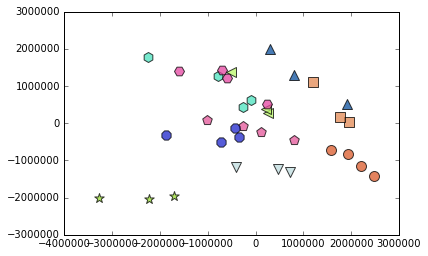

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

X2 = reduc_pca(X, 2).astype(int)
ncolors = np.random.rand(30).reshape(10, 3)
markers = (u'o', u'v', u'^', u'<', u'8', u's', u'p', u'*', u'h', u'H')

for i in range(X2.shape[0]):
    plt.scatter(X2[i,0], X2[i,1], s = 100, alpha = 0.75, c = ncolors[Y[i] - 1], marker = markers[Y[i] - 1])
plt.show()

<p>
    <strong>5.)</strong> Discuta sua taxa de erro do exercício 2 com a distribuição dos pontos do gráfico plotado
    do exercício anterior, discutindo por que seu classificador obteve a taxa de erro.
</p>

<strong>R: </strong> Sabemos que o desempenho dos classificadores é altamente proporcional ao quanto as classes estão separadas, e pelo gráfico, podemos observar que as classes das amostras de treinamento não estão bem distribuídas (observe a região do gráfico delimitada pelas coordenadas | 1000000 | < x e |1500000| < y). Portanto, o erro obtido no processo de classificação é devido às classes que se aglomeraram.